## TAREA 1 - EDA Dataset
# Insurance Company Benchmark (COIL 2000)
This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company.
The data consists of 86 variables and includes product usage data and socio-demographic data

# Importación de librerias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Funciones

In [53]:
def dame_variables_categoricas(dataset=None):
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other

def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    count_null = df[col_name].isnull().sum()
    if isContinuous:

        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)

    plt.tight_layout()

# Carga de datos:

In [65]:
df_ticdata2000 = pd.read_csv("../data/raw/tic/ticdata2000.txt", sep="\t", header=None )
df_ticeval2000 = pd.read_csv("../data/raw/tic/ticeval2000.txt", sep="\t", header=None )
df_tictgts2000= pd.read_csv("../data/raw/tic/tictgts2000.txt", sep="\t", header=None )
df_my_dictionary = pd.read_csv("../data/raw/tic/my_dictionary.txt",sep=" ")
df_l0  = pd.read_csv("../data/raw/tic/L0.txt",sep=";")
df_l1  = pd.read_csv("../data/raw/tic/L1.txt",sep=";")
df_l2  = pd.read_csv("../data/raw/tic/L2.txt",sep=";")
df_l3  = pd.read_csv("../data/raw/tic/L3.txt",sep=";")
df_l4  = pd.read_csv("../data/raw/tic/L4.txt",sep=";")


In [66]:
df_l4

Value            Label
0      0                0
1      1           1 - 49
2      2          50 - 99
3      3        100 - 199
4      4        200 - 499
5      5        500 - 999
6      6      1000 - 4999
7      7      5000 - 9999
8      8  10.000 - 19.999
9      9       20.000 - ?

In [58]:
df_val_gts = pd.concat([df_ticeval2000,df_tictgts2000],axis=1)
df_val_gts.columns = list(range(0,86))
df_total = pd.concat([df_ticdata2000,df_val_gts],axis=0)

In [59]:
df_total.columns = list(df_my_dictionary.Description)
df_total.columns

Index(['Customer_Subtype', 'Number_of_houses', 'Avg_size_household', 'Avg_age',
       'Customer_main_type', 'Roman_catholic', 'Protestant', 'Other_religion',
       'No_religion', 'Married', 'Living_together', 'Other_relation',
       'Singles', 'Household_without_children', 'Household_with_children',
       'High_level_education', 'Medium_level_education',
       'Lower_level_education', 'High_status', 'Entrepreneur', 'Farmer',
       'Middle_management', 'Skilled_labourers', 'Unskilled_labourers',
       'Social_class_A', 'Social_class_B1', 'Social_class_B2',
       'Social_class_C', 'Social_class_D', 'Rented_house', 'Home_owners',
       '1_car', '2_cars', 'No_car', 'National_Health_Service',
       'Private_health_insurance', 'Income_<_30.000', 'Income_30-45.000',
       'Income_45-75.000', 'Income_75-122.000', 'Income_>123.000',
       'Average_income', 'Purchasing_power_class',
       'Contribution_private_third_party_insurance',
       'Contribution_third_party_insurance_(firms

In [25]:
df_total.shape

(9822, 86)

In [60]:
df_total.head()

Customer_Subtype  Number_of_houses  Avg_size_household  Avg_age  \
0                33                 1                   3        2   
1                37                 1                   2        2   
2                37                 1                   2        2   
3                 9                 1                   3        3   
4                40                 1                   4        2   

   Customer_main_type  Roman_catholic  Protestant  Other_religion  \
0                   8               0           5               1   
1                   8               1           4               1   
2                   8               0           4               2   
3                   3               2           3               2   
4                  10               1           4               1   

   No_religion  Married  Living_together  Other_relation  Singles  \
0            3        7                0               2        1   
1            4        6                2               2        0   
2            4        3                2               4        4   
3            4        5                2               2        2   
4            4        7                1               2        2   

   Household_without_children  Household_with_children  High_level_education  \
0                           2                        6                     1   
1                           4                        5                     0   
2                           4                        2                     0   
3                           3                        4                     3   
4                           4                        4                     5   

   Medium_level_education  Lower_level_education  High_status  Entrepreneur  \
0                       2                      7            1             0   
1                       5                      4            0             0   
2                       5                      4            0             0   
3                       4                      2            4             0   
4                       4                      0            0             5   

   Farmer  Middle_management  Skilled_labourers  Unskilled_labourers  \
0       1                  2                  5                    2   
1       0                  5                  0                    4   
2       0                  7                  0                    2   
3       0                  3                  1                    2   
4       4                  0                  0                    0   

   Social_class_A  Social_class_B1  Social_class_B2  Social_class_C  \
0               1                1                2               6   
1               0                2                3               5   
2               0                5                0               4   
3               3                2                1               4   
4               9                0                0               0   

   Social_class_D  Rented_house  Home_owners  1_car  2_cars  No_car  \
0               1             1            8      8       0       1   
1               0             2            7      7       1       2   
2               0             7            2      7       0       2   
3               0             5            4      9       0       0   
4               0             4            5      6       2       1   

   National_Health_Service  Private_health_insurance  Income_<_30.000  \
0                        8                         1                0   
1                        6                         3                2   
2                        9                         0                4   
3                        7                         2                1   
4                        5                         4                0   

   Income_30-45.000  Income_45-75.000  Income_75-122.000  Income_>123.

# Analisis generales de la tabla
Dimensión:

In [27]:
print(df_total.shape, df_total.drop_duplicates().shape)

(9822, 86) (8380, 86)


Tipos de datos:

In [28]:
df_total.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MGODRK': dtype('int64'),
 'MGODPR': dtype('int64'),
 'MGODOV': dtype('int64'),
 'MGODGE': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINK

In [34]:
# Analisis de nulos
df_nulos = pd.merge(df_total.isnull().sum(axis = 0).sort_values().to_frame('valores_nulos').reset_index(), df_total.dtypes.to_frame('tipo').reset_index(),
                    on = 'index', how = 'inner')
df_nulos.sort_values(['valores_nulos', 'tipo'])

index  valores_nulos   tipo
0    MOSTYPE              0  int64
1     PFIETS              0  int64
2   PPLEZIER              0  int64
3    PZEILPL              0  int64
4     PBRAND              0  int64
5    PWAOREG              0  int64
6    PGEZONG              0  int64
7   PPERSONG              0  int64
8     PLEVEN              0  int64
9      PBROM              0  int64
10    PWERKT              0  int64
11  PTRACTOR              0  int64
12  PAANHANG              0  int64
13   PVRAAUT              0  int64
14   PMOTSCO              0  int64
15   PBESAUT              0  int64
16  PPERSAUT              0  int64
17   PWALAND              0  int64
18   PINBOED              0  int64
19  PBYSTAND              0  int64
20   AWAPART              0  int64
21   AWABEDR              0  int64
22   AINBOED              0  int64
23    AFIETS              0  int64
24  APLEZIER              0  int64
25   AZEILPL              0  int64
26    ABRAND              0  int64
27   AWAOREG              0  int64
28   AGEZONG              0  int64
29  APERSONG              0  int64
30   PWABEDR              0  int64
31    ALEVEN              0  int64
32    AWERKT              0  int64
33  ATRACTOR              0  int64
34  AAANHANG              0  int64
35   AVRAAUT              0  int64
36   AMOTSCO              0  int64
37   ABESAUT              0  int64
38  APERSAUT              0  int64
39   AWALAND              0  int64
40     ABROM              0  int64
41   PWAPART              0  int64
42  MKOOPKLA              0  int64
43   MINKGEM              0  int64
44  MBERHOOG              0  int64
45  MOPLLAAG              0  int64
46  MOPLMIDD              0  int64
47  MOPLHOOG              0  int64
48  MFWEKIND              0  int64
49  MFGEKIND              0  int64
50  MFALLEEN              0  int64
51    MRELOV              0  int64
52  MBERZELF              0  int64
53    MRELSA              0  int64
54    MGODGE              0  int64
55    MGODOV              0  int64
56    MGODPR              0  int64
57    MGODRK              0  int64
58  MOSHOOFD              0  int64
59  MGEMLEEF              0  int64
60   MGEMOMV              0  int64
61  MAANTHUI              0  int64
62    MRELGE              0  int64
63  ABYSTAND              0  int64
64  MBERBOER              0  int64
65  MBERARBG              0  int64
66  MINK123M              0  int64
67  MINK7512              0  int64
68  MINK4575              0  int64
69  MINK3045              0  int64
70   MINKM30              0  int64
71    MZPART              0  int64
72   MZFONDS              0  int64
73     MAUT0              0  int64
74  MBERMIDD              0  int64
75     MAUT2              0  int64
76    MHKOOP              0  int64
77    MHHUUR              0  int64
78      MSKD              0  int64
79      MSKC              0  int64
80     MSKB2              0  int64
81     MSKB1              0  int64
82      MSKA              0  int64
83  MBERARBO              0  int64
84     MAUT1              0  int64
85   CARAVAN              0  int64

In [36]:
# Analisis de columnas duplicadas
columnas_duplicadas = duplicate_columns(df_total)
columnas_duplicadas

[]

# Exploración de la variable objetivo y tratamiento

In [37]:
# Analisis de la variable CARAVAN
df_total['CARAVAN'].value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

In [29]:
df_caravan = df_total['CARAVAN'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_caravan_conteo = df_total['CARAVAN'].value_counts().reset_index()
df_caravan_pc = pd.merge(df_caravan, df_caravan_conteo, on=['index'], how='inner')
df_caravan_pc

index    percent  CARAVAN
0      0  94.033802     9236
1      1   5.966198      586

In [30]:
fig_1 = px.histogram(df_caravan_pc, x="index", y=['percent'])
fig_2 = px.pie(df_caravan_pc, names='index', values='percent', title='CARAVAN')
fig_2.show()

# Selección de threshold por filas y columnas para eliminar valores missing

In [31]:
df_ticdata2000_null_columns = df_ticdata2000.isnull().sum().sort_values(ascending=False)
df_ticdata2000_null_rows = df_ticdata2000.isnull().sum(axis=1).sort_values(ascending=False)
print(df_ticdata2000_null_columns.shape, df_ticdata2000_null_rows.shape)

df_ticdata2000_null_columnas = pd.DataFrame(df_ticdata2000_null_columns, columns=['nulos_columnas'])
df_ticdata2000_null_filas = pd.DataFrame(df_ticdata2000_null_rows, columns=['nulos_filas'])
df_ticdata2000_null_filas['target'] = df_ticdata2000['CARAVAN'].copy()
df_ticdata2000_null_columnas['porcentaje_columnas'] = df_ticdata2000_null_columnas['nulos_columnas']/df_ticdata2000.shape[0]
df_ticdata2000_null_filas['porcentaje_filas']= df_ticdata2000_null_filas['nulos_filas']/df_ticdata2000.shape[1]

(86,) (5822,)


In [34]:
threshold=0.9
list_vars_not_null = list(df_ticdata2000_null_columnas[df_ticdata2000_null_columnas['porcentaje_columnas']<threshold].index)
df_ticdata2000_filter_null = df_ticdata2000.loc[:, list_vars_not_null]
df_ticdata2000_filter_null.shape

(5822, 86)

# Tipos: Variables categoricas y numericas

In [52]:
# Variables Categoricas
list_var_categoricas, other = dame_variables_categoricas(dataset=df_total)
df_total[list_var_categoricas] = df_total[list_var_categoricas].astype("category")
# Variables Numericas
list_var_numericas = list(df_total.select_dtypes('float').columns)
df_total[list_var_numericas] = df_total[list_var_numericas].astype(float)

/Users/saulsegura/opt/anaconda3/envs/env_practica0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/saulsegura/opt/anaconda3/envs/env_practica0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/saulsegura/opt/anaconda3/envs/env_practica0/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

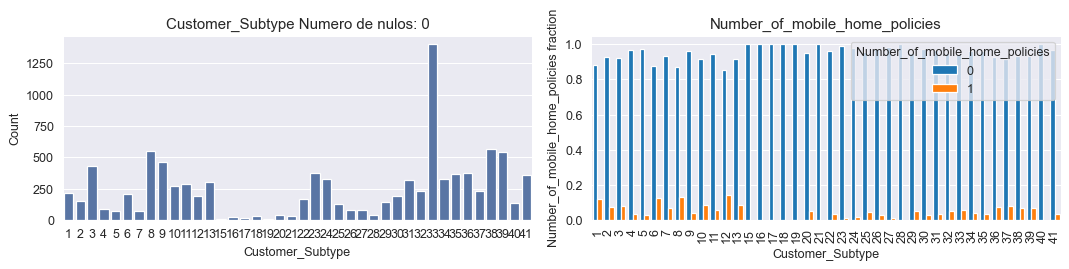

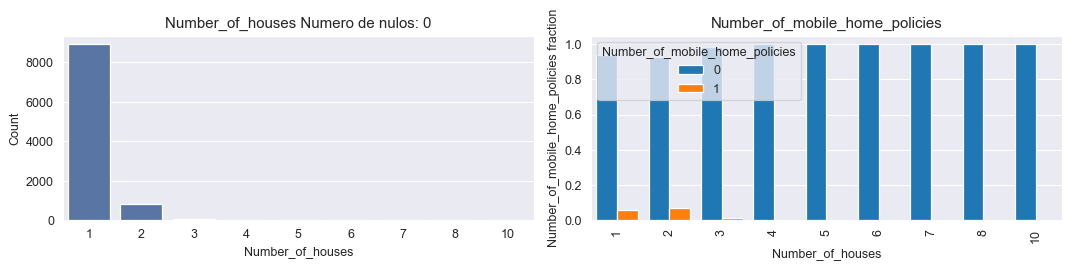

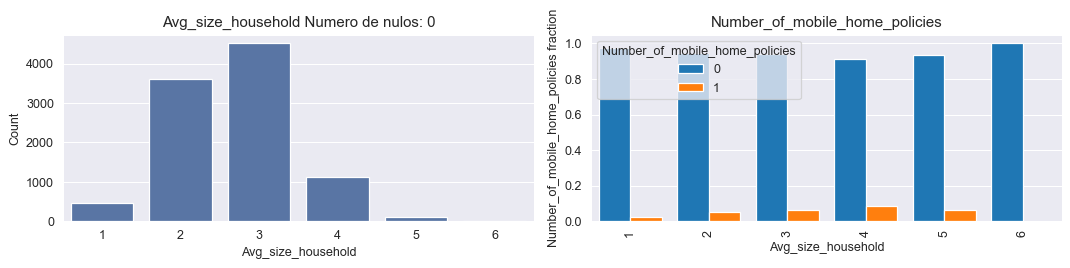

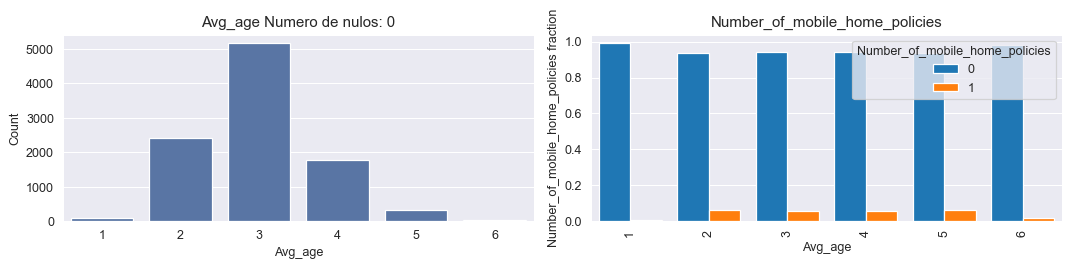

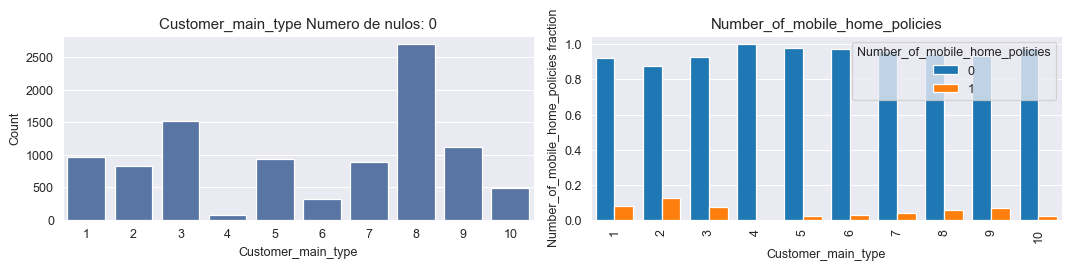

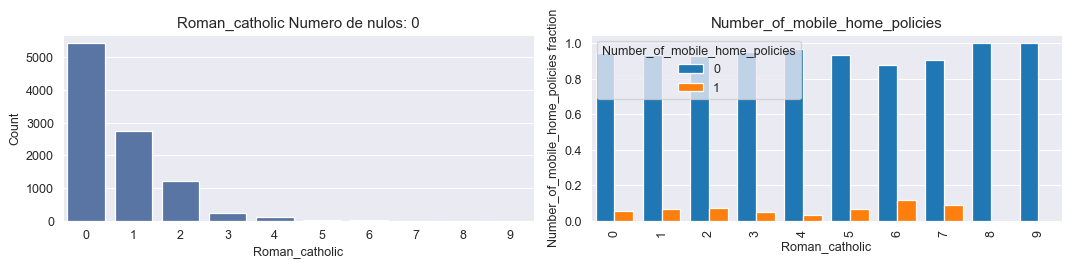

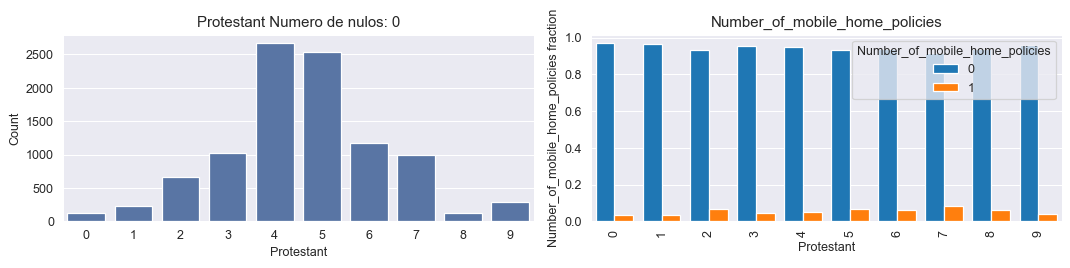

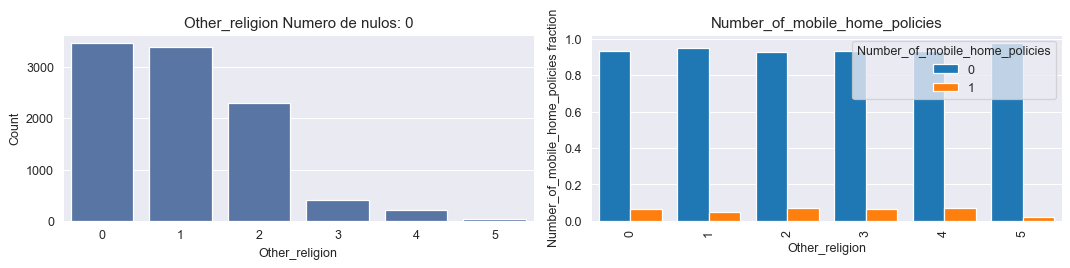

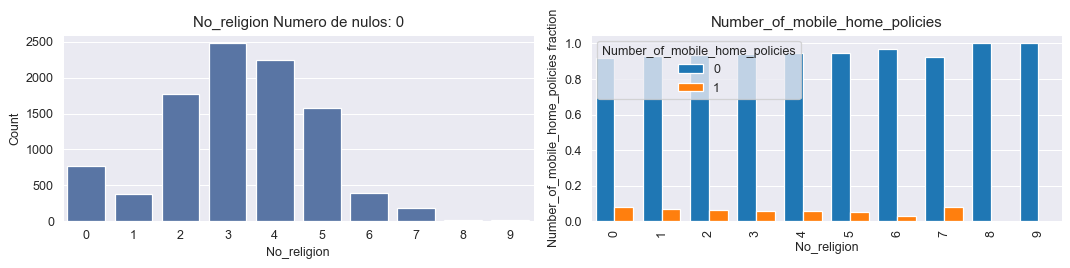

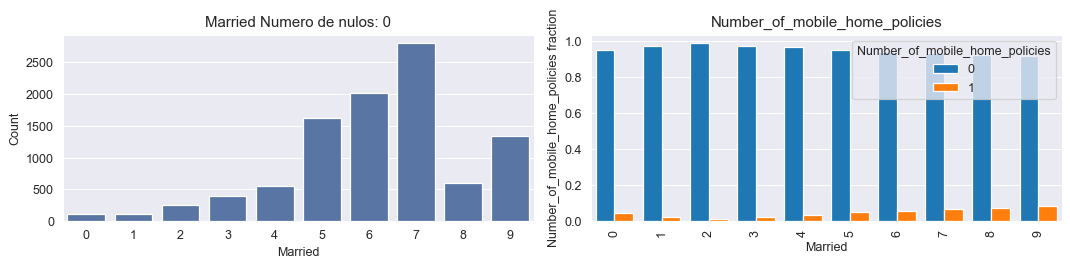

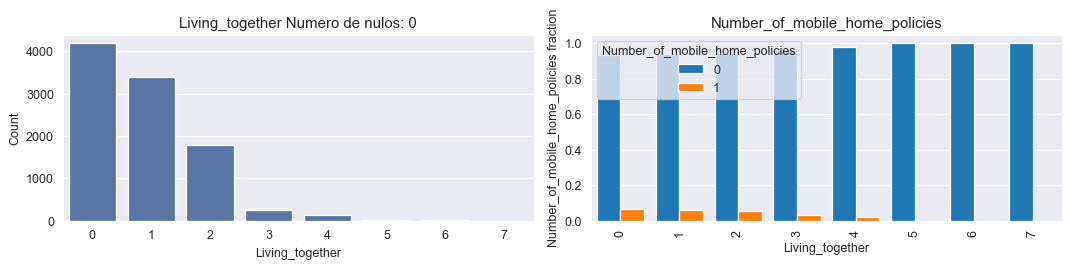

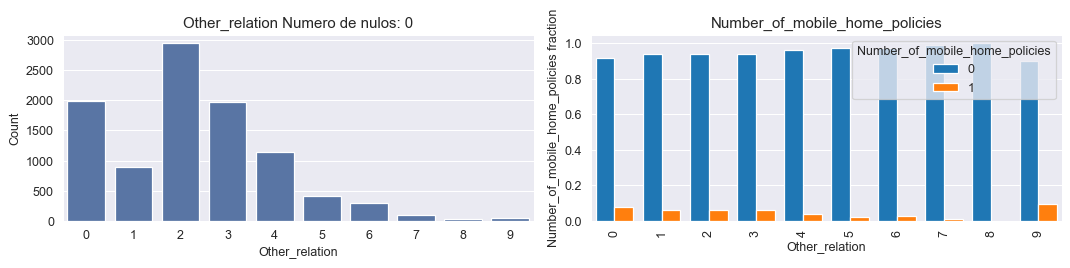

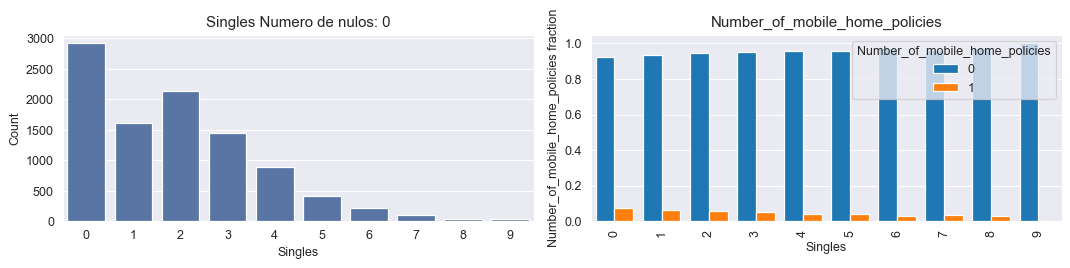

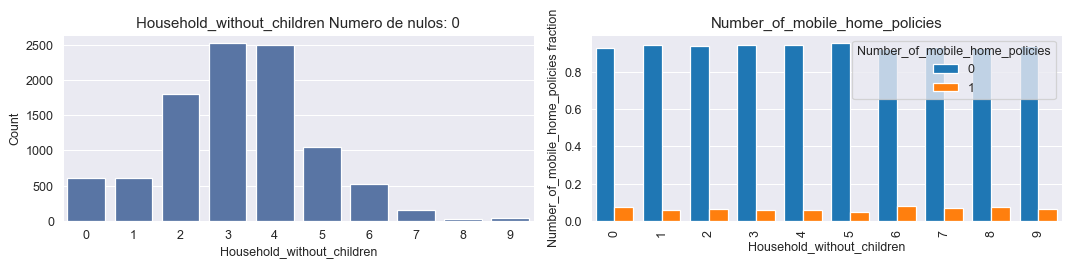

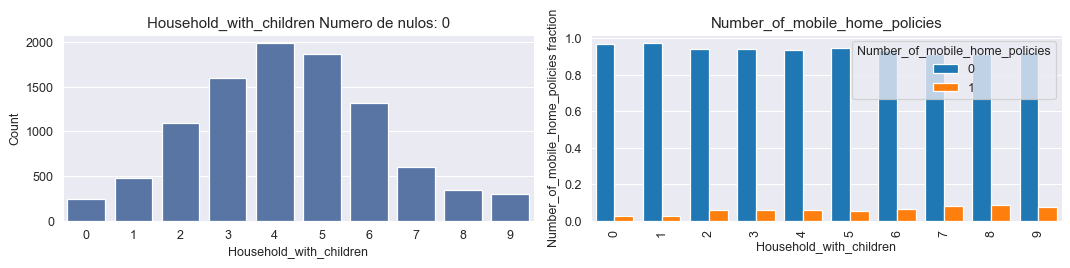

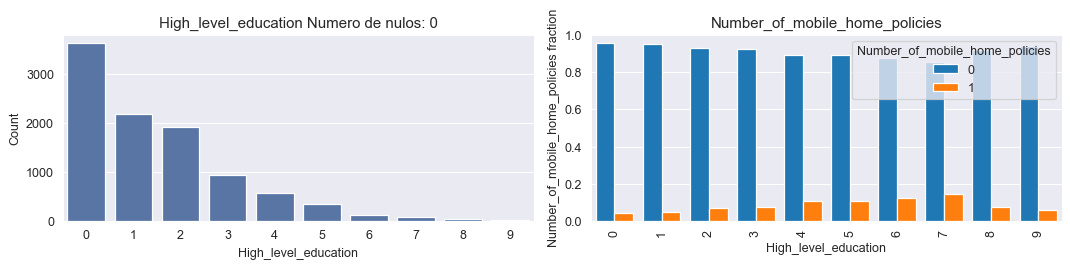

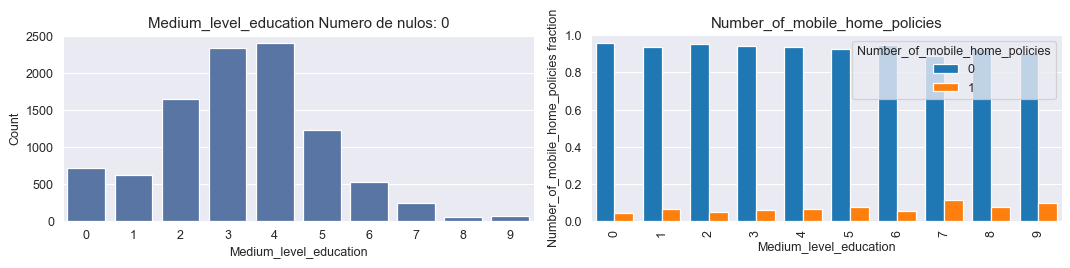

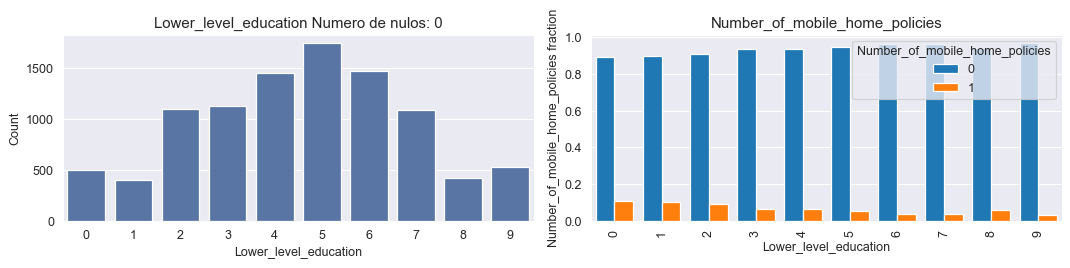

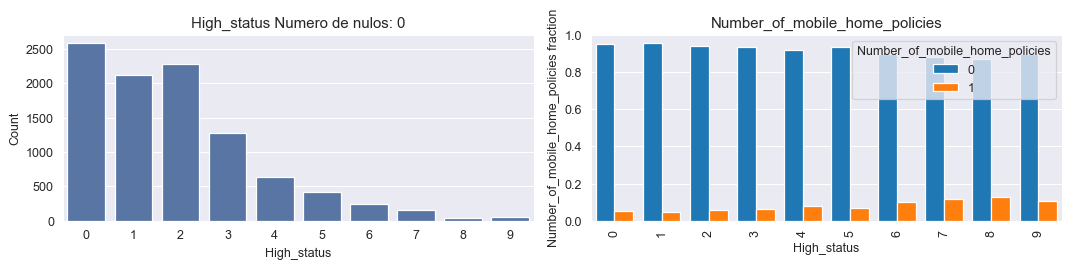

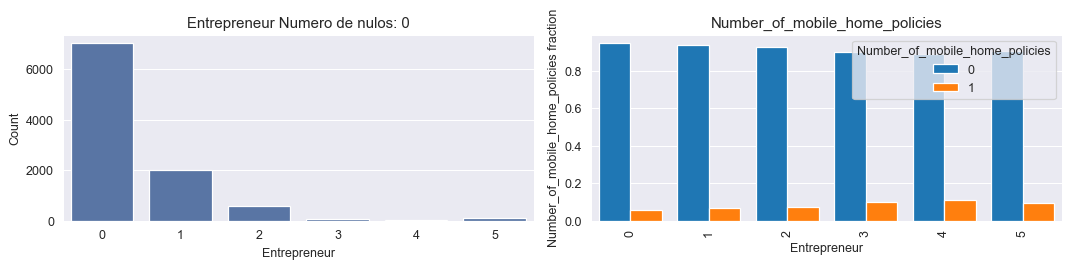

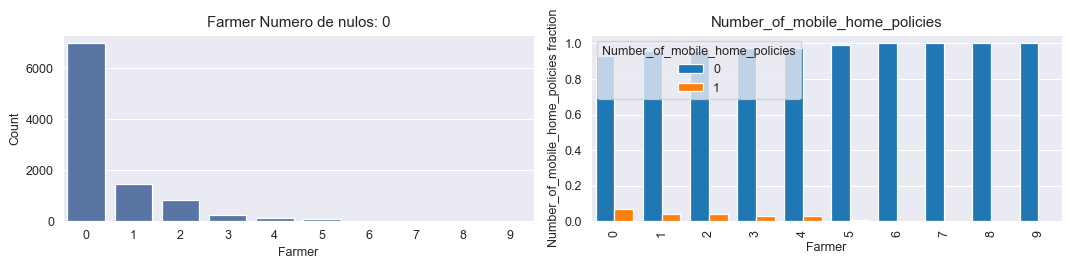

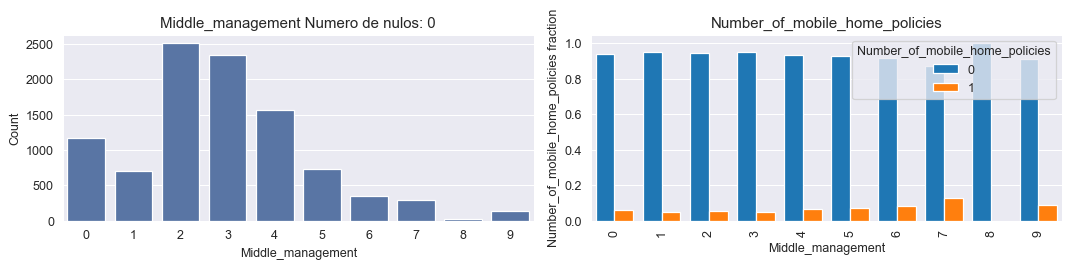

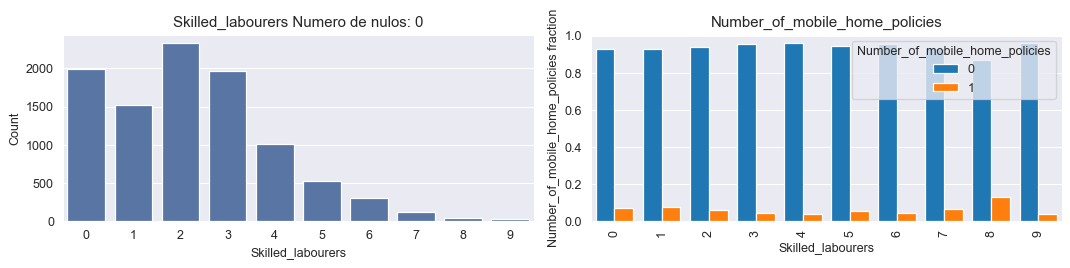

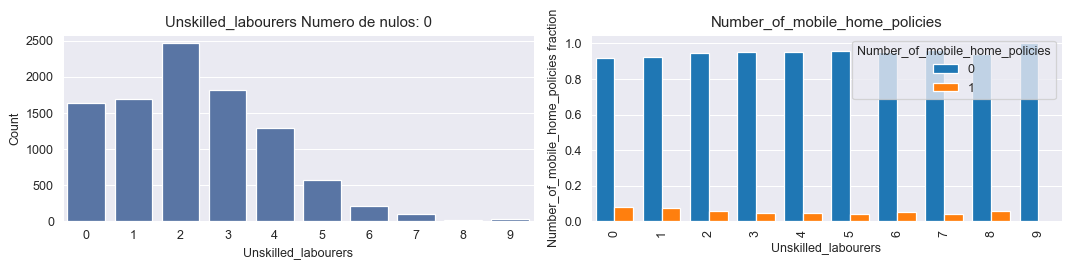

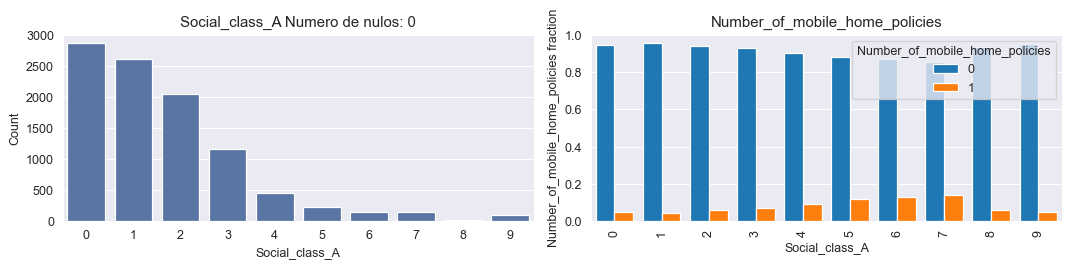

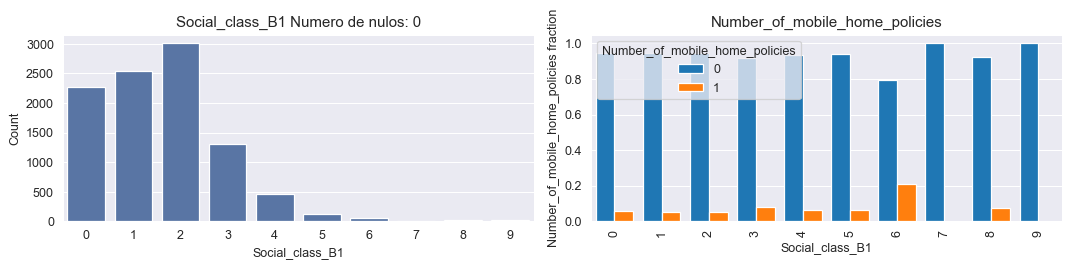

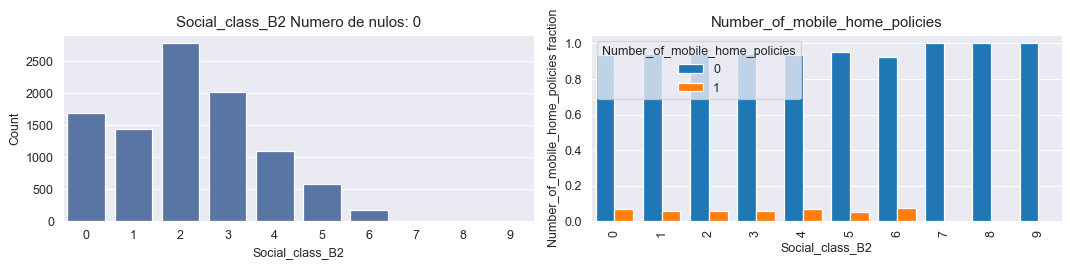

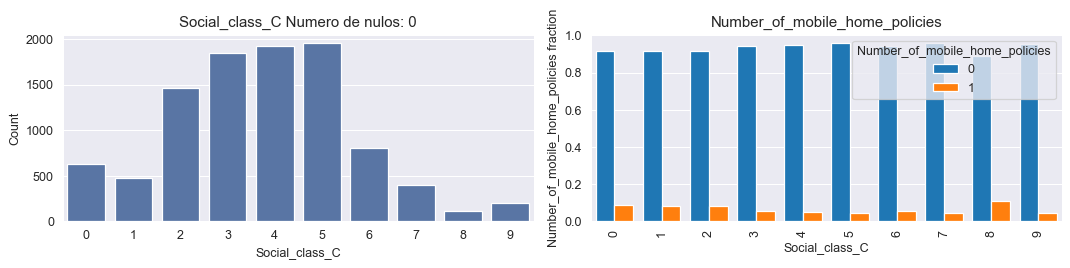

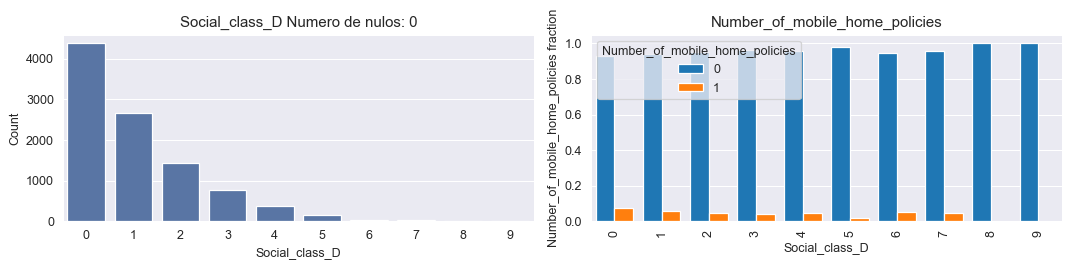

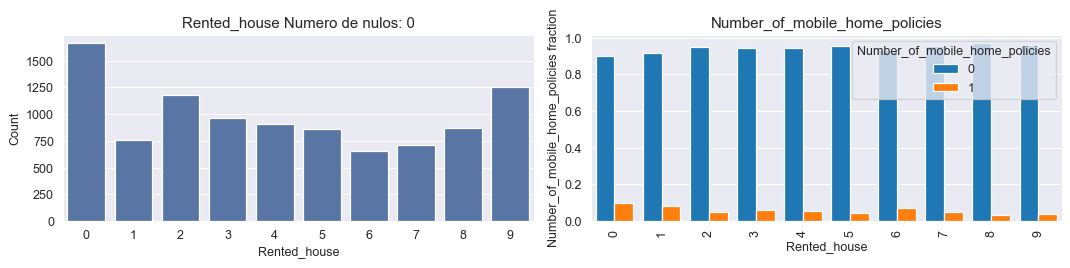

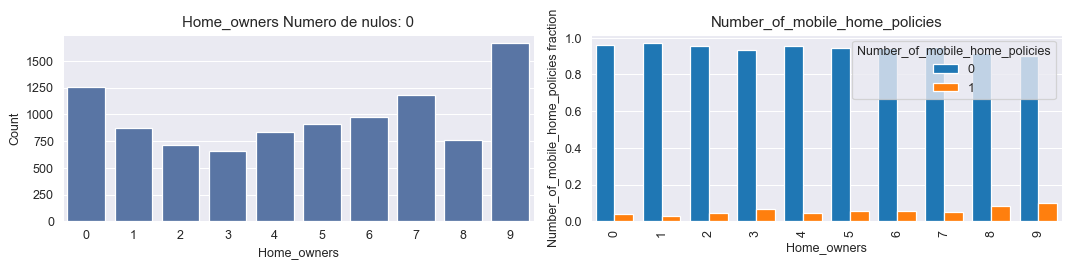

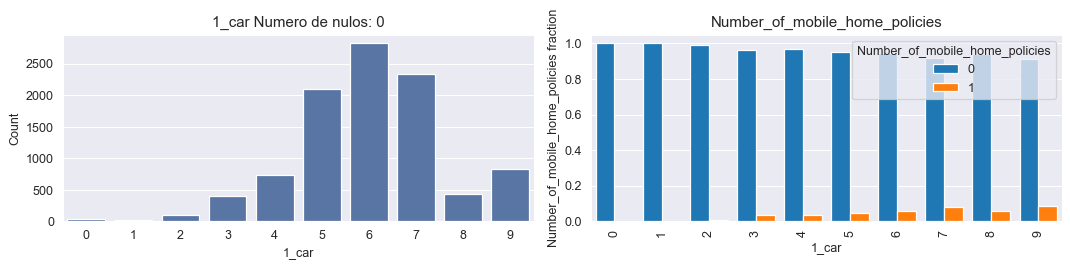

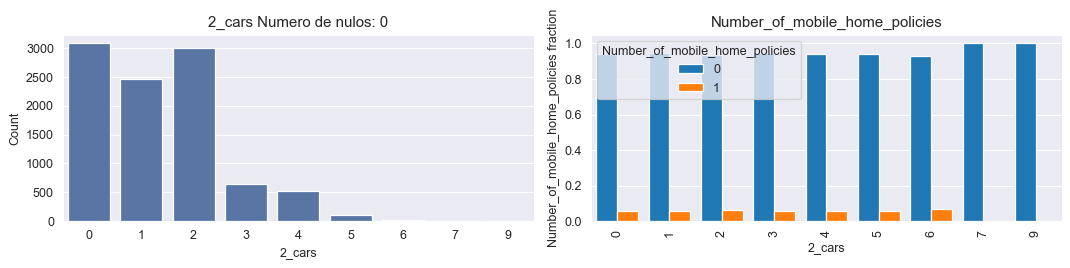

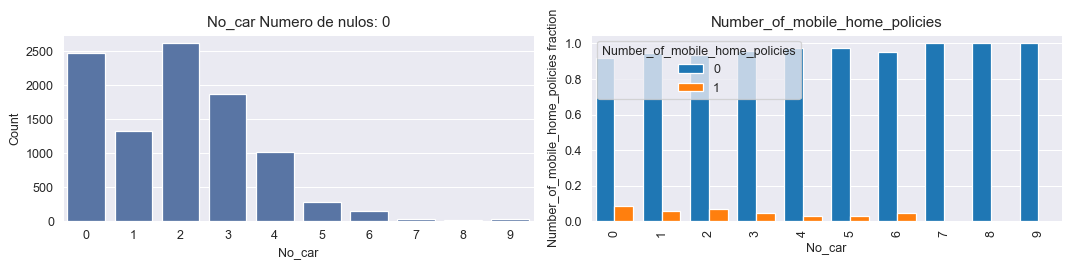

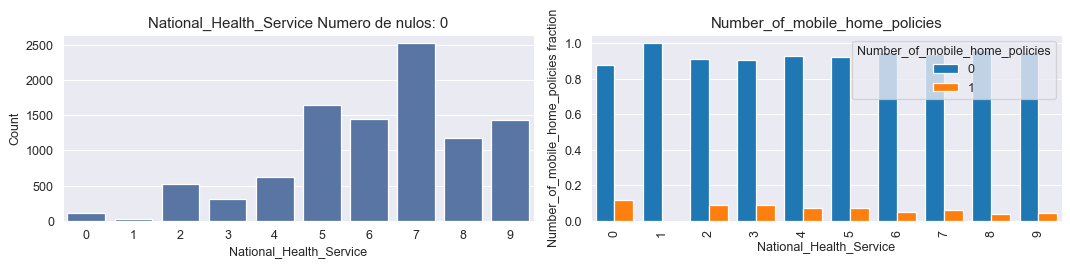

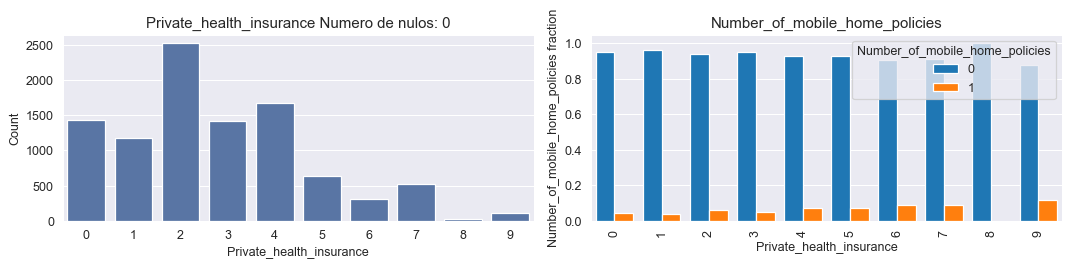

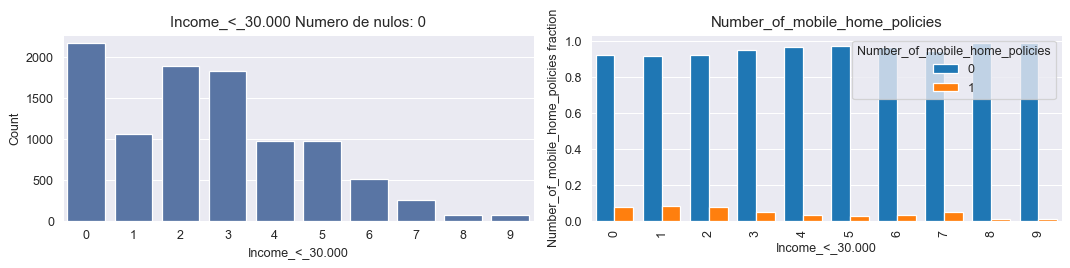

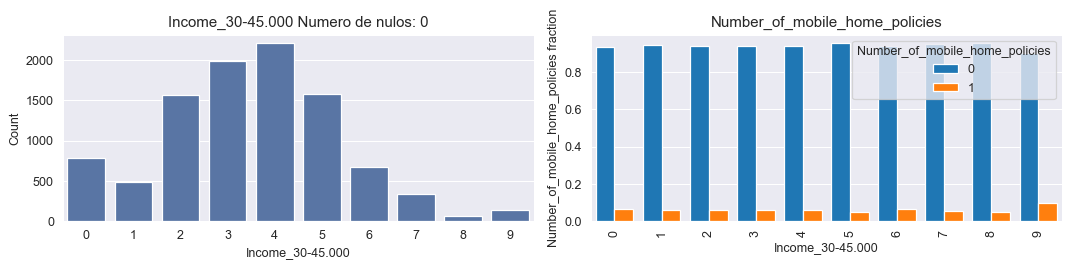

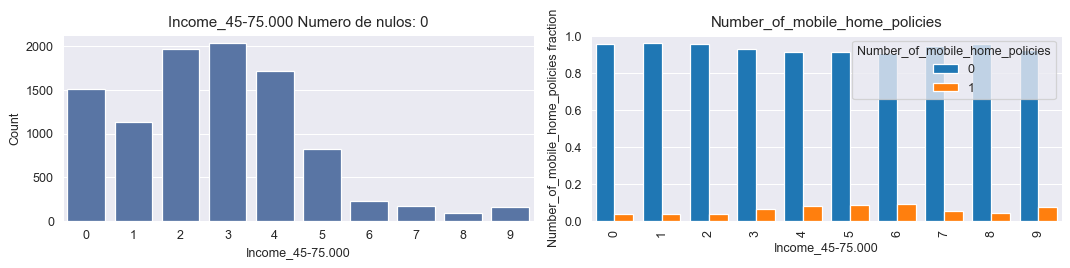

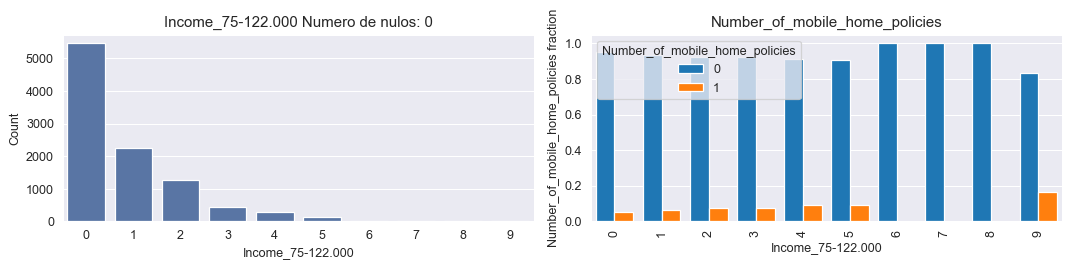

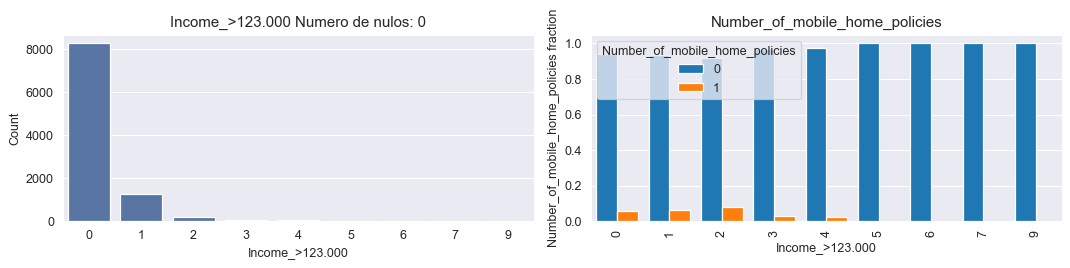

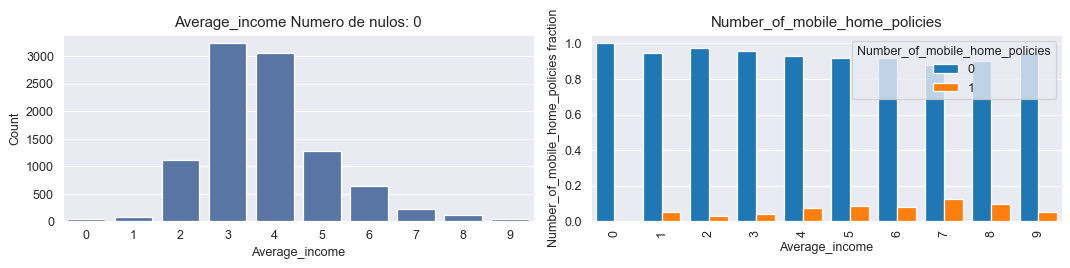

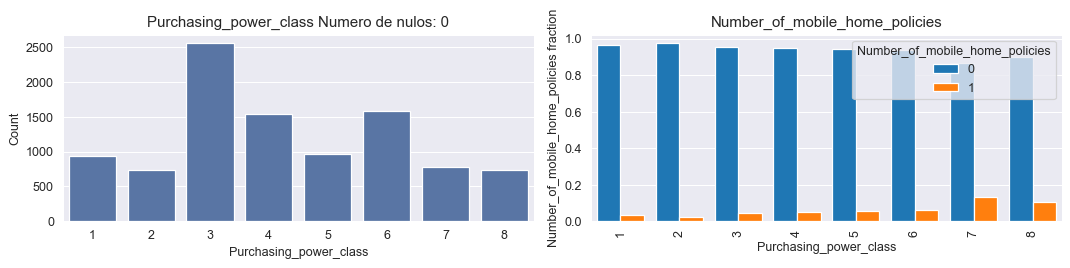

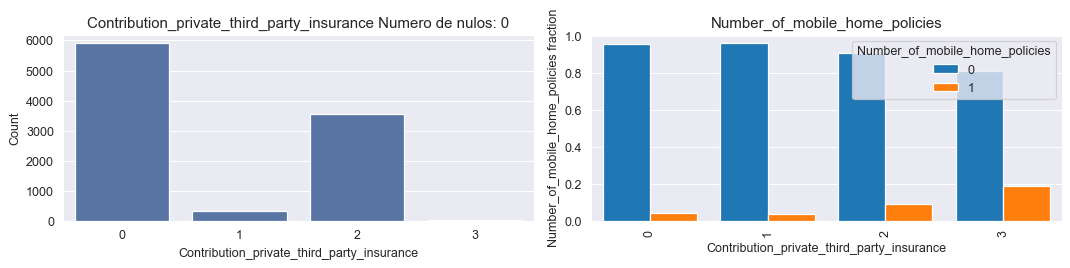

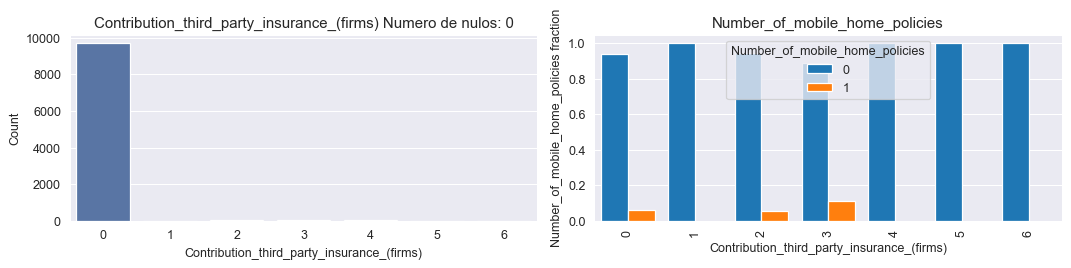

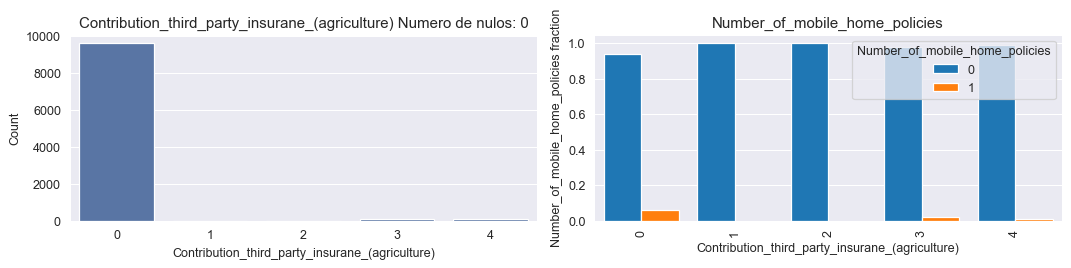

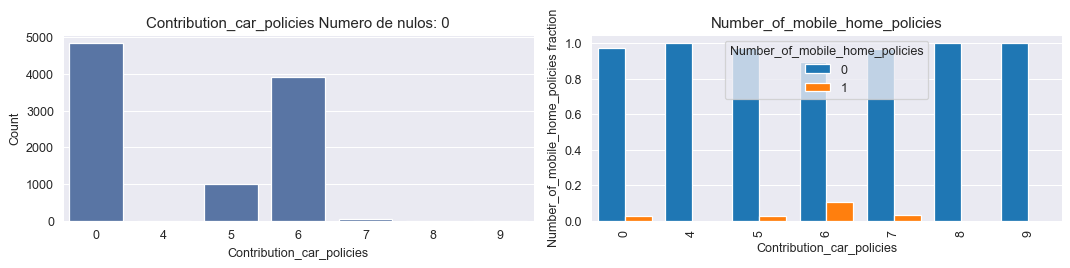

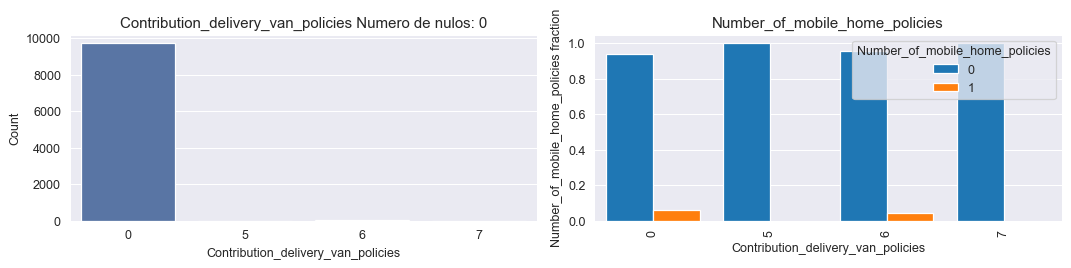

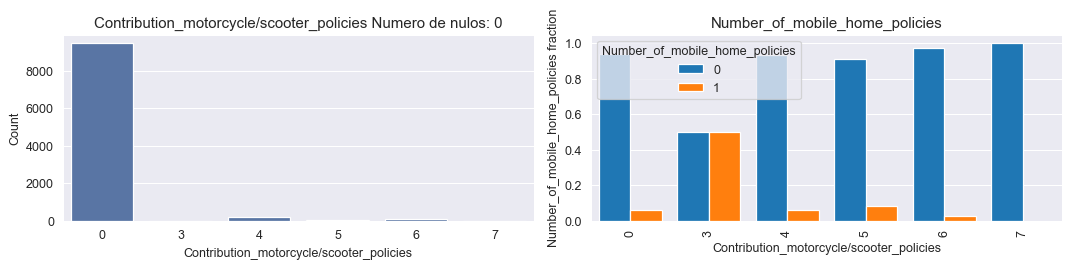

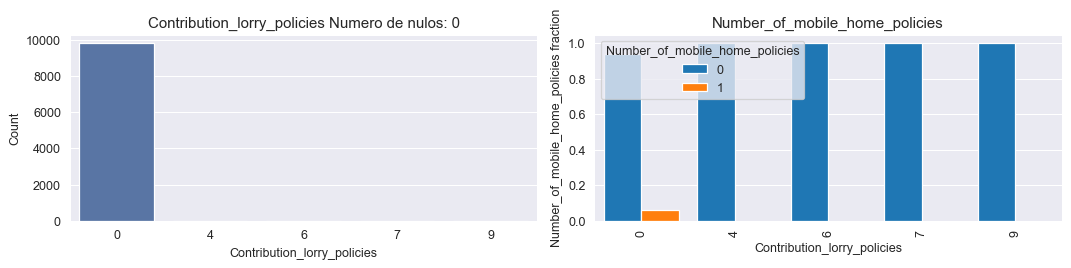

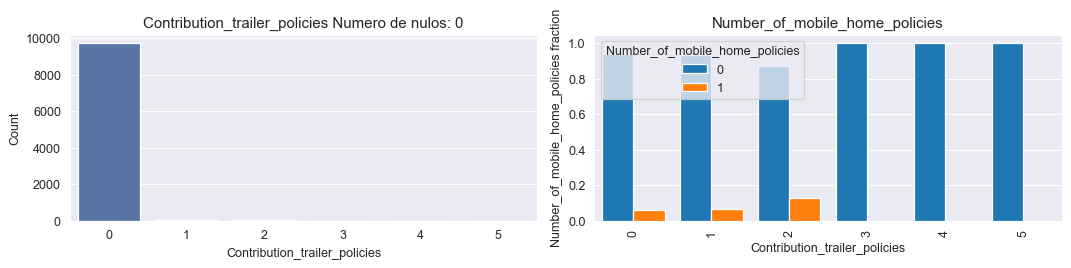

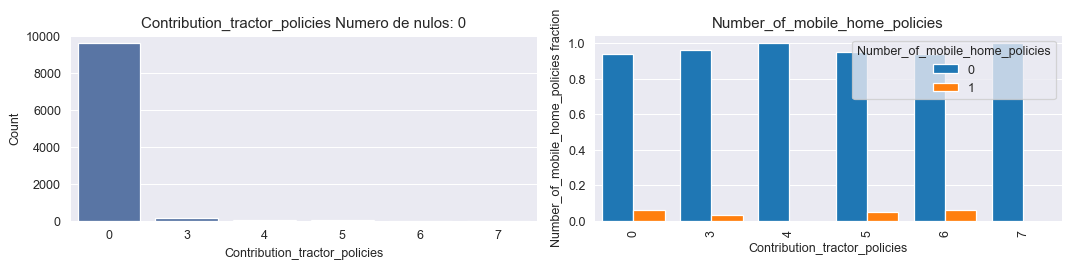

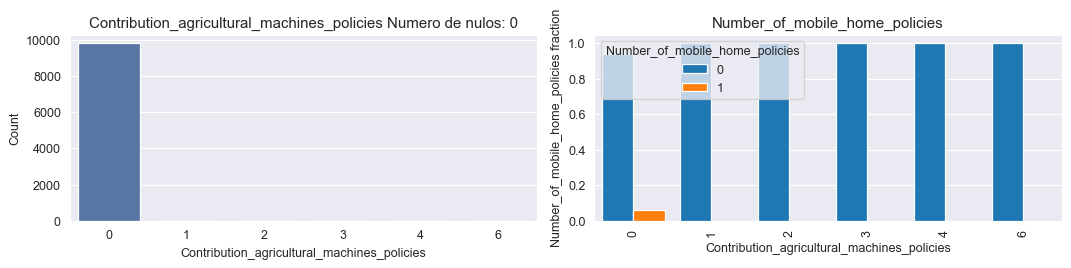

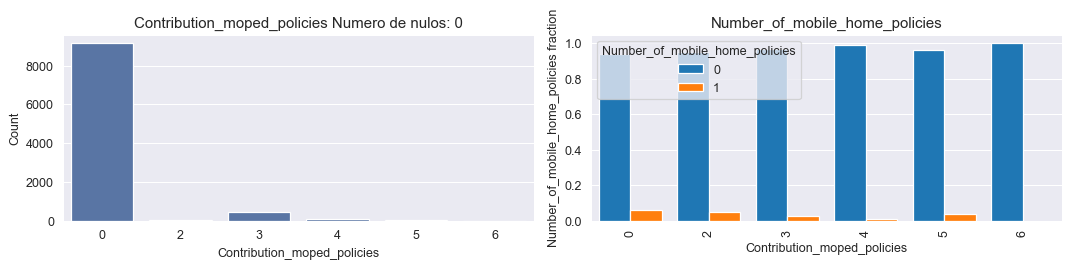

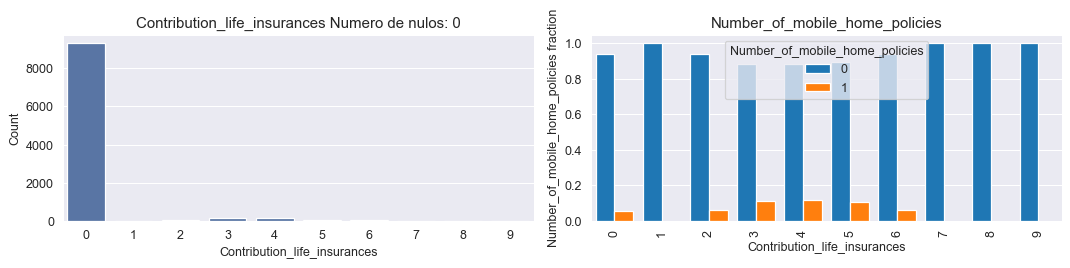

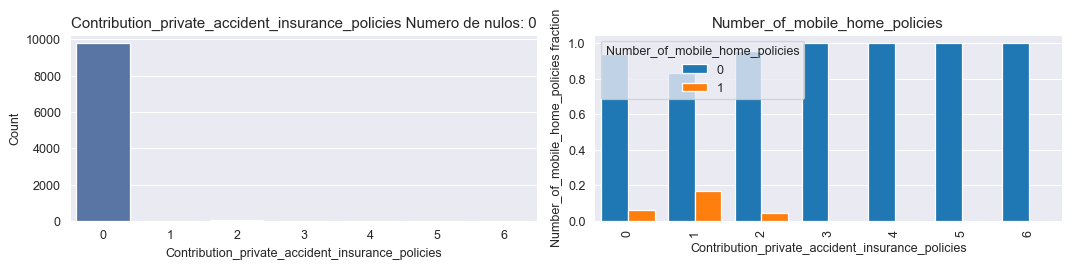

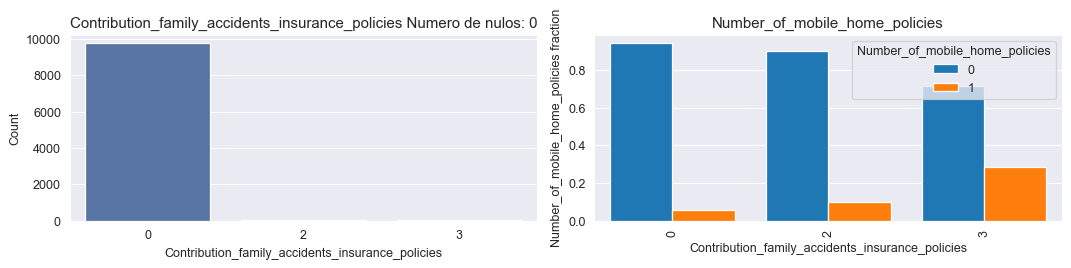

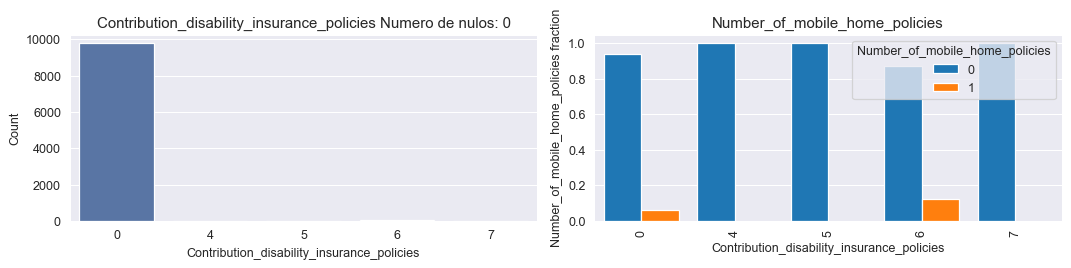

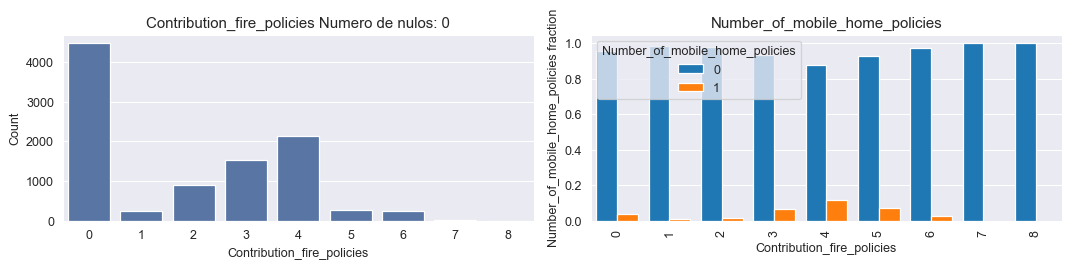

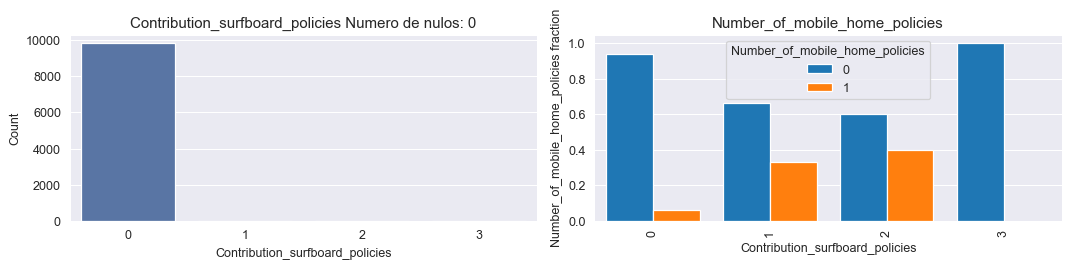

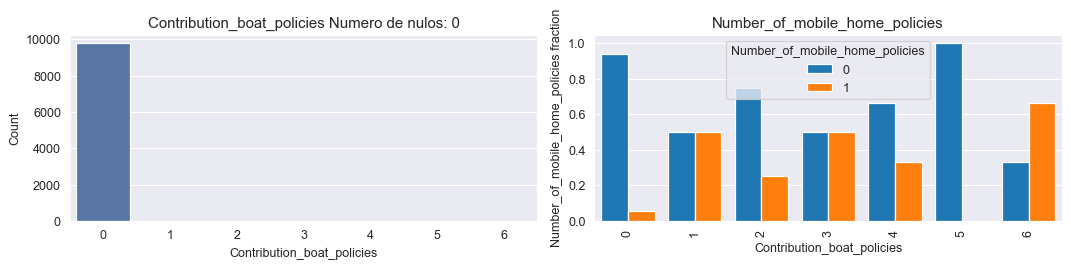

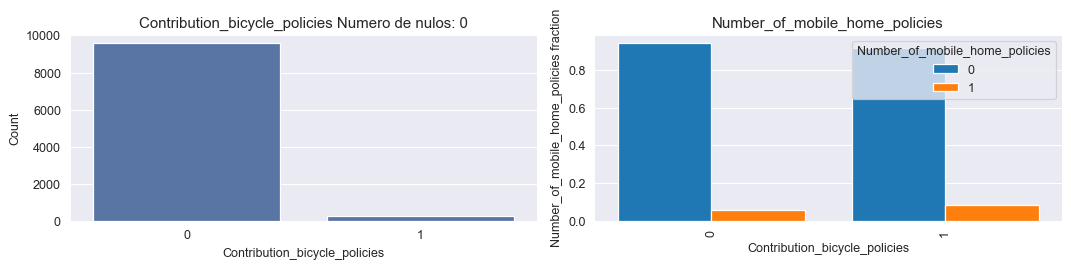

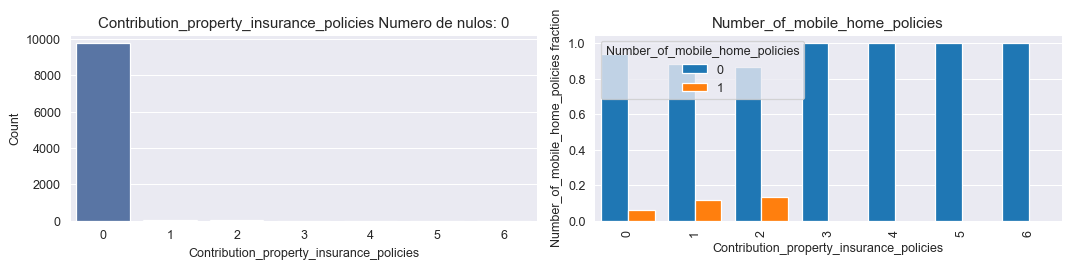

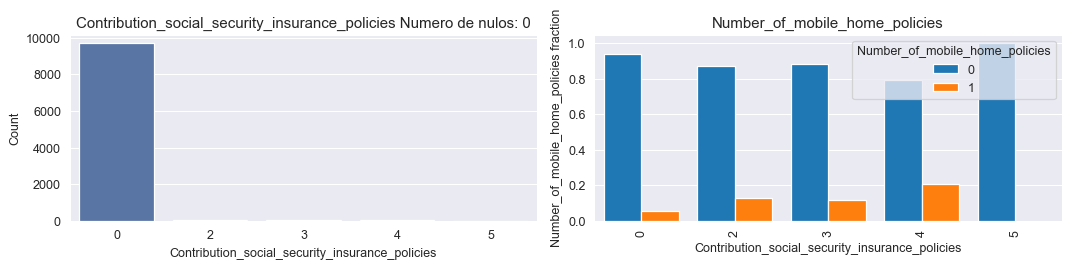

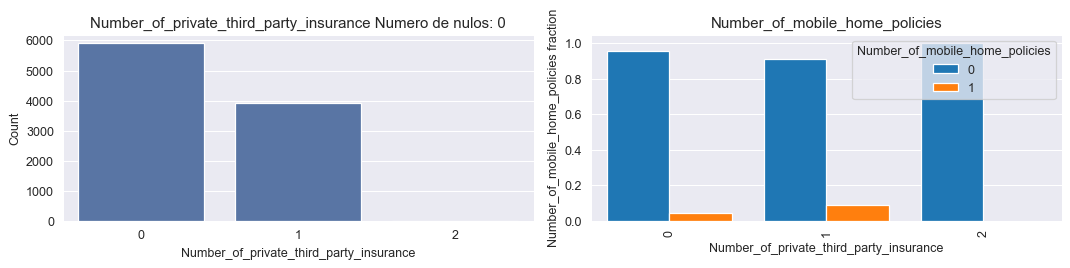

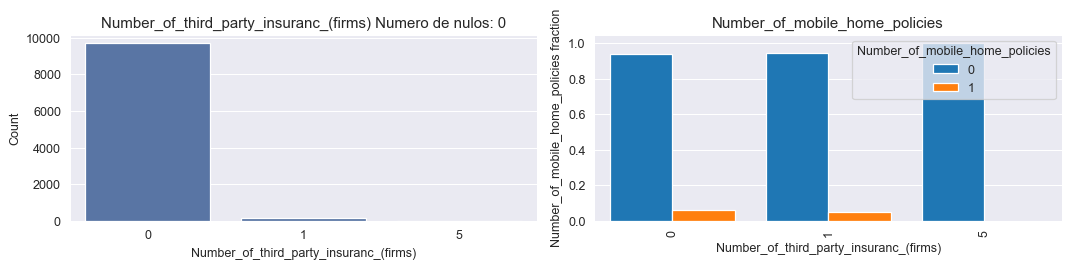

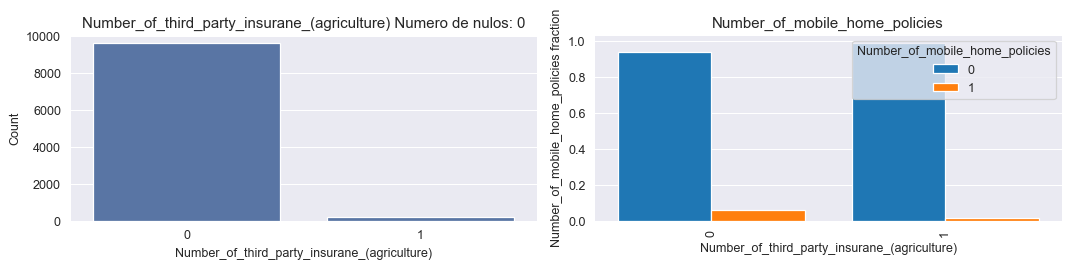

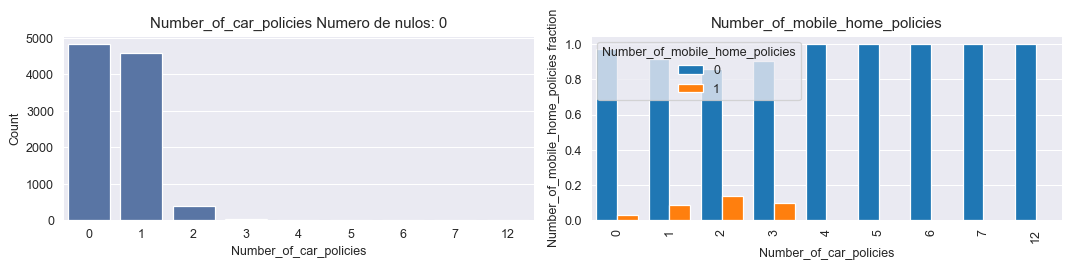

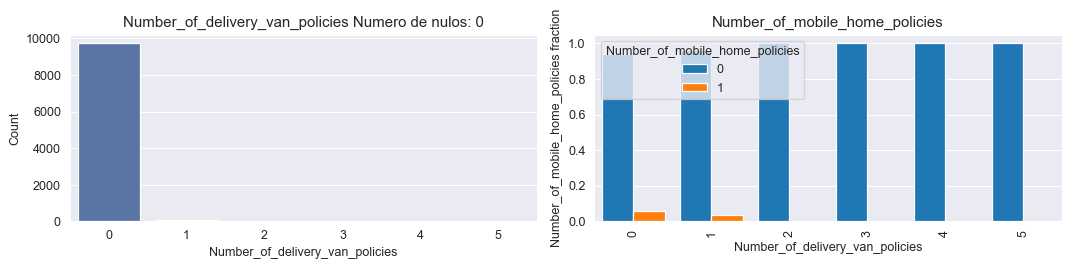

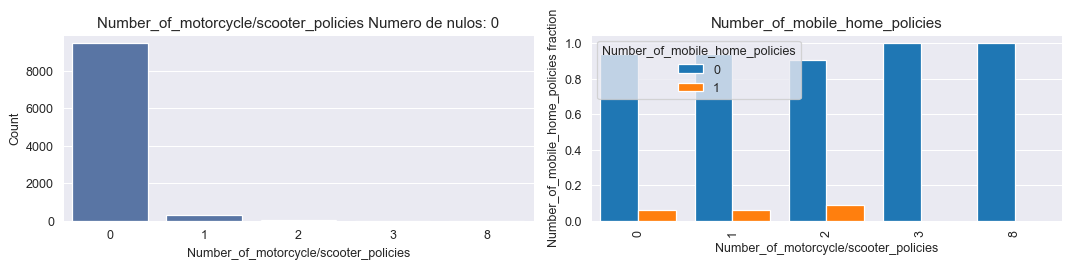

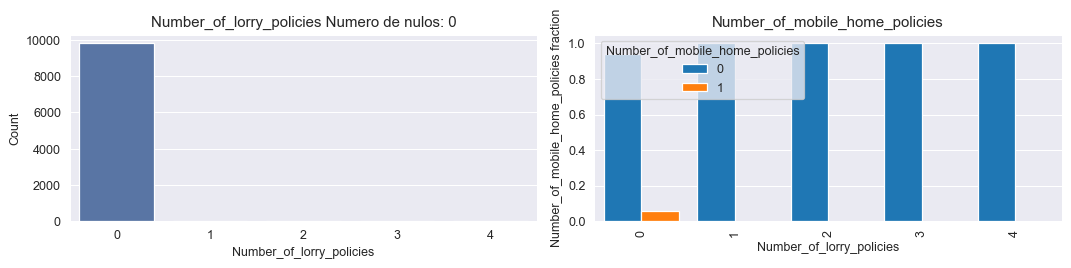

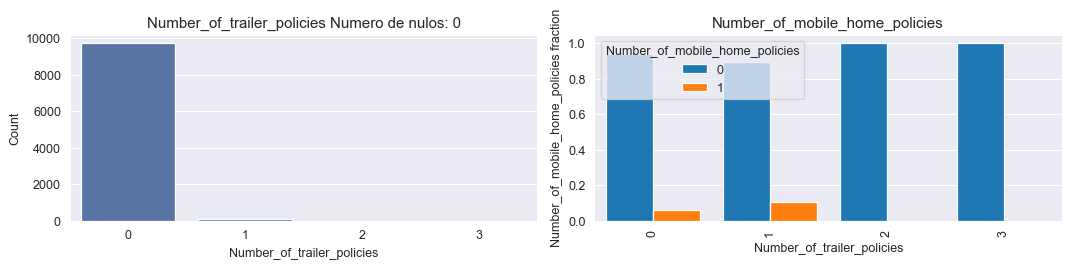

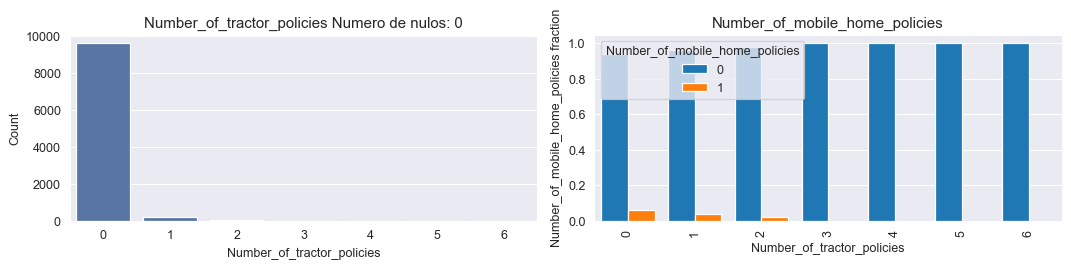

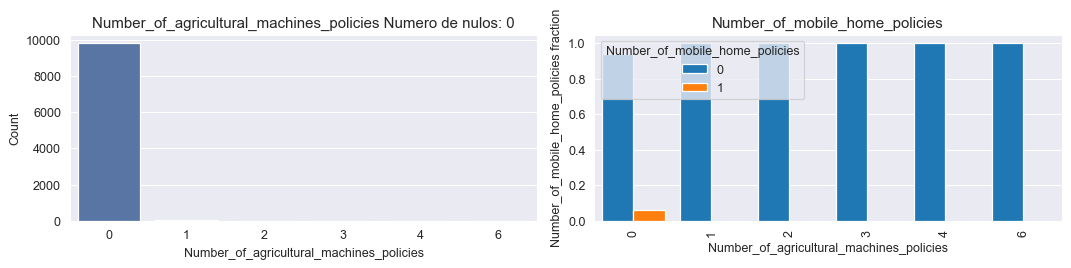

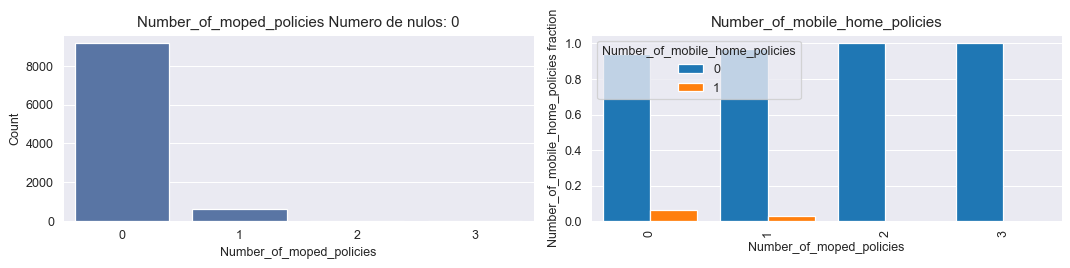

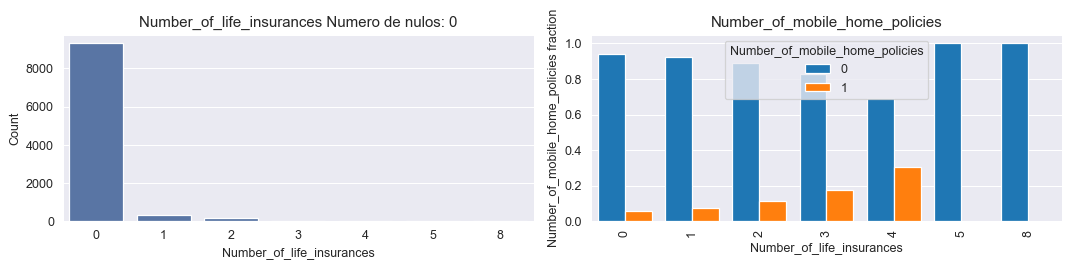

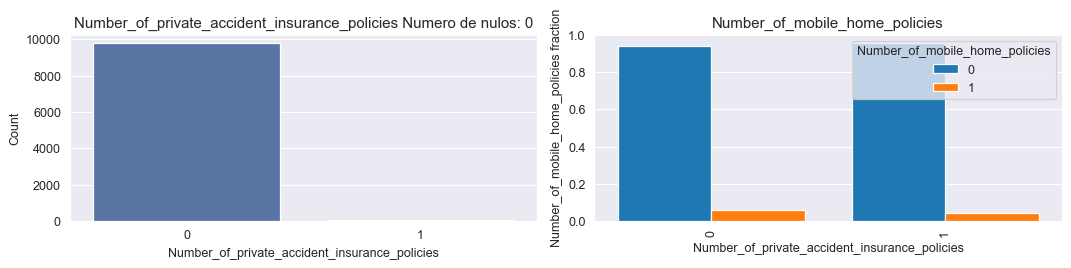

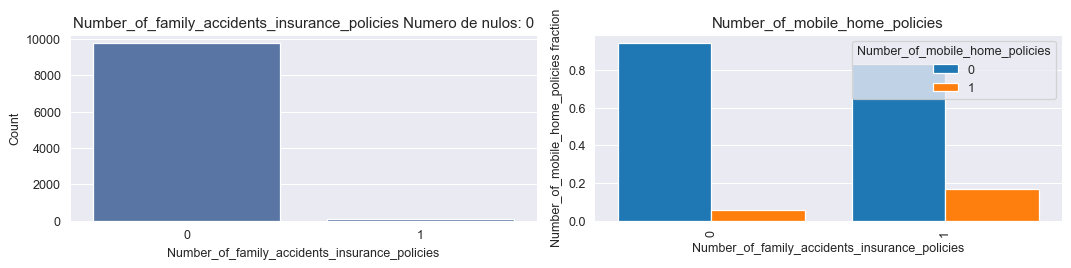

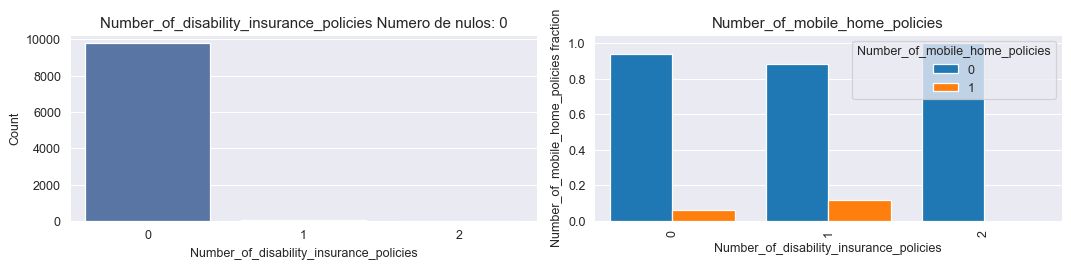

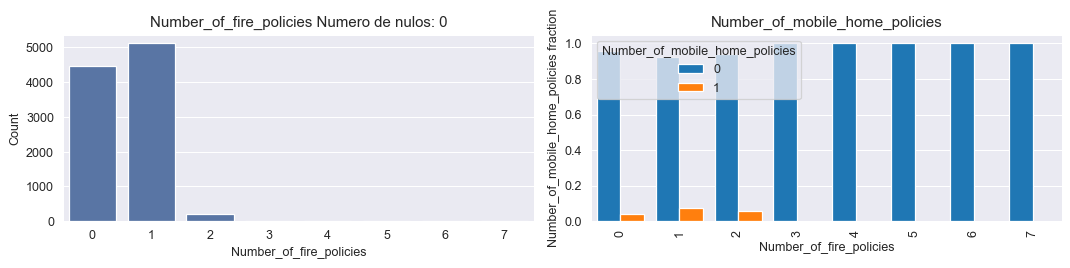

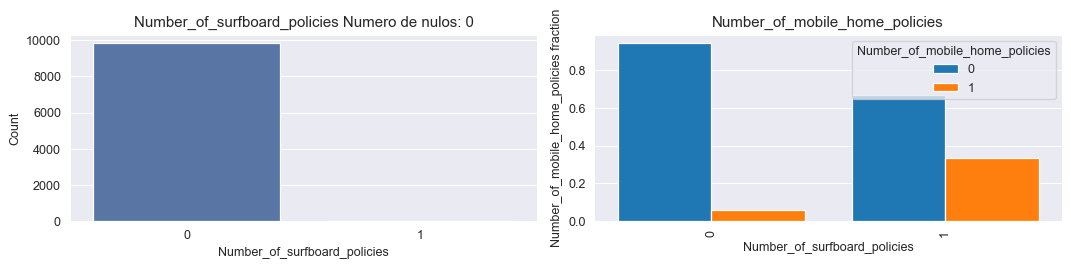

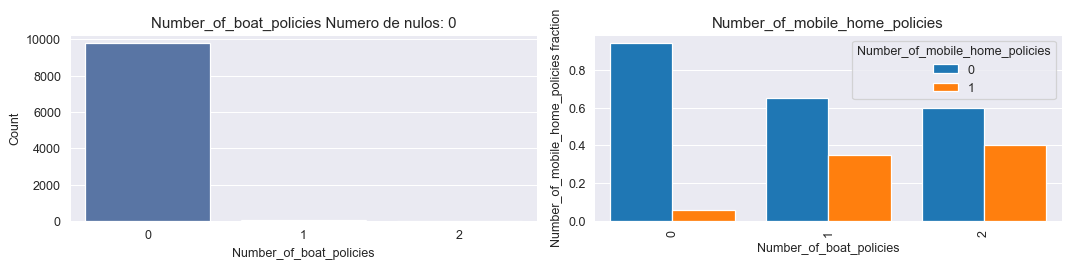

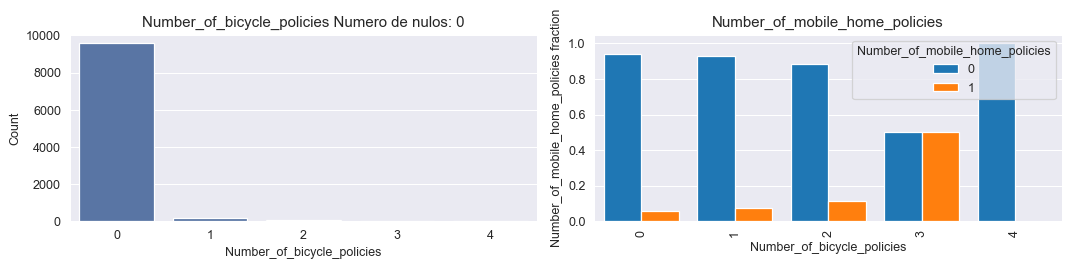

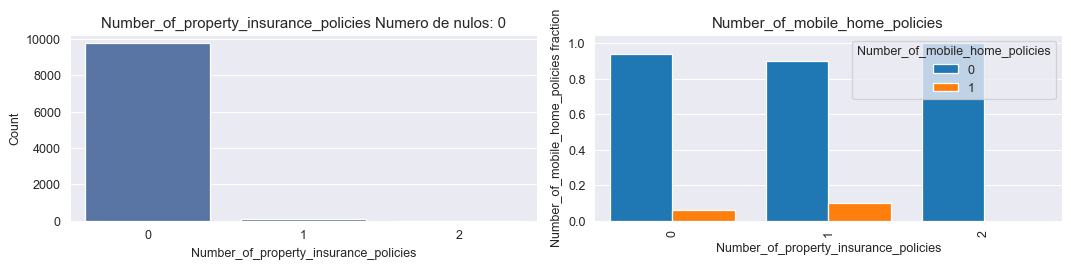

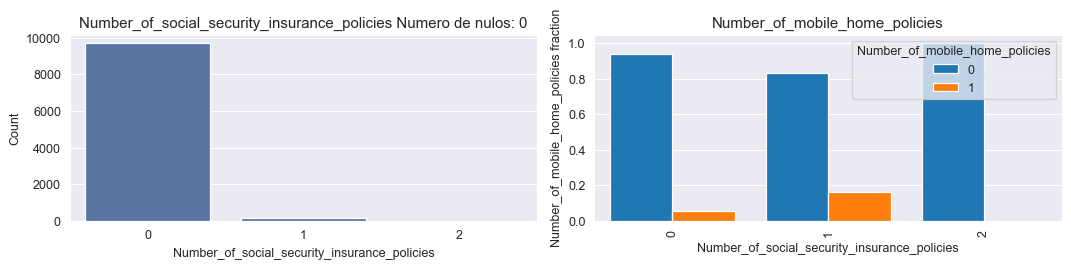

In [61]:
# warnings.filterwarnings('ignore')
for i in list(df_total.columns):
    if (df_total[i].dtype==float) & (i!='Number_of_mobile_home_policies'):
        plot_feature(df_total, col_name=i, isContinuous=True, target='Number_of_mobile_home_policies')
    elif  i!='Number_of_mobile_home_policies':
        plot_feature(df_total, col_name=i, isContinuous=False, target='Number_of_mobile_home_policies')

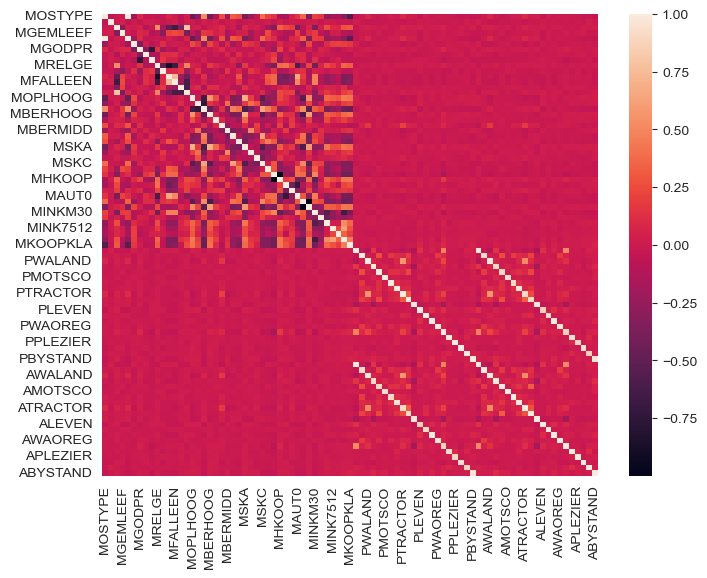

In [41]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_total.drop(columns=['CARAVAN']).corr());

In [62]:
df_total.head()

Customer_Subtype  Number_of_houses  Avg_size_household  Avg_age  \
0                33                 1                   3        2   
1                37                 1                   2        2   
2                37                 1                   2        2   
3                 9                 1                   3        3   
4                40                 1                   4        2   

   Customer_main_type  Roman_catholic  Protestant  Other_religion  \
0                   8               0           5               1   
1                   8               1           4               1   
2                   8               0           4               2   
3                   3               2           3               2   
4                  10               1           4               1   

   No_religion  Married  Living_together  Other_relation  Singles  \
0            3        7                0               2        1   
1            4        6                2               2        0   
2            4        3                2               4        4   
3            4        5                2               2        2   
4            4        7                1               2        2   

   Household_without_children  Household_with_children  High_level_education  \
0                           2                        6                     1   
1                           4                        5                     0   
2                           4                        2                     0   
3                           3                        4                     3   
4                           4                        4                     5   

   Medium_level_education  Lower_level_education  High_status  Entrepreneur  \
0                       2                      7            1             0   
1                       5                      4            0             0   
2                       5                      4            0             0   
3                       4                      2            4             0   
4                       4                      0            0             5   

   Farmer  Middle_management  Skilled_labourers  Unskilled_labourers  \
0       1                  2                  5                    2   
1       0                  5                  0                    4   
2       0                  7                  0                    2   
3       0                  3                  1                    2   
4       4                  0                  0                    0   

   Social_class_A  Social_class_B1  Social_class_B2  Social_class_C  \
0               1                1                2               6   
1               0                2                3               5   
2               0                5                0               4   
3               3                2                1               4   
4               9                0                0               0   

   Social_class_D  Rented_house  Home_owners  1_car  2_cars  No_car  \
0               1             1            8      8       0       1   
1               0             2            7      7       1       2   
2               0             7            2      7       0       2   
3               0             5            4      9       0       0   
4               0             4            5      6       2       1   

   National_Health_Service  Private_health_insurance  Income_<_30.000  \
0                        8                         1                0   
1                        6                         3                2   
2                        9                         0                4   
3                        7                         2                1   
4                        5                         4                0   

   Income_30-45.000  Income_45-75.000  Income_75-122.000  Income_>123.